<a href="https://colab.research.google.com/github/EmmanuelUdeA/Modelos1-Pruebas-Saber-Pro/blob/main/04%20-%20Only_onehot_%26_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle
!chmod 600 ./kaggle.json

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...
kaggle: error: the following arguments are required: command


In [3]:
!kaggle competitions download -c udea-ai4eng-20241

 99% 21.0M/21.2M [00:00<00:00, 216MB/s]
100% 21.2M/21.2M [00:00<00:00, 215MB/s]


In [4]:
!unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:

d = pd.read_csv("train.csv")
d

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,20195,BIOLOGIA,LA GUAJIRA,Entre 500 mil y menos de 1 millón,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-alto
692496,754213,20212,PSICOLOGIA,NORTE SANTANDER,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Primaria incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) incompleta,bajo
692497,504185,20183,ADMINISTRACIÓN EN SALUD OCUPACIONAL,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Menos de 10 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,Si,Si,Si,Secundaria (Bachillerato) incompleta,medio-bajo
692498,986620,20195,PSICOLOGIA,TOLIMA,Entre 2.5 millones y menos de 4 millones,Menos de 10 horas,Estrato 1,No,Primaria completa,No,No,N,Si,Si,No,Primaria completa,bajo


In [7]:
submission_example = pd.read_csv('submission_example.csv')
submission_example

,ID,RENDIMIENTO_GLOBAL
0,550236,medio-bajo
1,98545,medio-bajo
2,499179,medio-alto
3,782980,alto
4,785185,medio-bajo
...,...,...
296781,496981,alto
296782,209415,medio-alto
296783,239074,medio-alto
296784,963852,medio-bajo


In [8]:
t = pd.read_csv('test.csv')
t

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa


In [26]:
def categorize_program(programa):

    if programa.lower().startswith('inge') or programa.lower().startswith('bioingenier'):
        return 'INGENIERIA'
    elif programa.lower().startswith('derec') or programa.lower().startswith('jurisprudencia'):
        return 'DERECHO'
    elif programa.lower().startswith('educ') or programa.lower().startswith('pedag') or programa.lower().startswith('deporte') or programa.lower().startswith('español'):
        return 'EDUCACION'
    elif programa.lower().startswith('medic') or programa.lower().startswith('odont') or programa.lower().startswith('enferme') or programa.lower().startswith('psic') or programa.lower().startswith('instrumentacion') or programa.lower().startswith('nutrici') or programa.lower().startswith('terap'):
        return 'SALUD'
    elif programa.lower().startswith('adminis') or programa.lower().startswith('negoc') or programa.lower().startswith('banca') or programa.lower().startswith('comercio') or programa.lower().startswith('mercade'):
        return 'ADMINISTRACION'
    elif programa.lower().startswith('antropolo') or programa.lower().startswith('estudios') or programa.lower().startswith('filolo') or programa.lower().startswith('filoso') or programa.lower().startswith('sociolog') or programa.lower().startswith('teolog') or programa.lower().startswith('historia') or programa.lower().startswith('trabajo') or programa.lower().startswith('traduccion'):
        return 'HUMANAS'
    elif programa.lower().startswith('arte') or programa.lower().startswith('cine') or programa.lower().startswith('foto') or programa.lower().startswith('musica') or programa.lower().startswith('animaci') or programa.lower().startswith('bellas') or programa.lower().startswith('danza'):
        return 'ARTES'
    elif programa.lower().startswith('astronomia') or programa.lower().startswith('bacteriologia') or programa.lower().startswith('biolog') or programa.lower().startswith('ciencia') or programa.lower().startswith('agronom') or programa.lower().startswith('arqueologia') or programa.lower().startswith('geo') or programa.lower().startswith('zootecnia') or programa.lower().startswith('teolog'):
        return 'CIENCIAS'
    elif programa.lower().startswith('comunicaci') or programa.lower().startswith('direccion') or programa.lower().startswith('marketing') or programa.lower().startswith('periodismo') or programa.lower().startswith('publicidad'):
        return 'COMUNICACIONES'
    elif programa.lower().startswith('construcc'):
        return 'CONSTRUCCIONES'
    elif programa.lower().startswith('contadur') or programa.lower().startswith('econom') or programa.lower().startswith('finanz') or programa.lower().startswith('relaciones'):
        return 'ECONOMIA'
    elif programa.lower().startswith('dise') or programa.lower().startswith('diseño') :
        return 'DISEÑO'
    elif programa.lower().startswith('fisica') or programa.lower().startswith('geografia') or programa.lower().startswith('matem') or programa.lower().startswith('microbiolo') or programa.lower().startswith('quimica') or programa.lower().startswith('ecologia') or programa.lower().startswith('estad') or programa.lower().startswith('pedag') or programa.lower().startswith('bioquimica'):
        return 'EXACTAS'
    elif programa.lower().startswith('licenciatura') or programa.lower().startswith('estudios'):
        return 'LICENCIATURAS'
    elif programa.lower().startswith('profesional'):
        return 'PROFESIONAL'
    elif programa.lower().startswith('gerencia') or programa.lower().startswith('gesti') :
        return 'GESTION'
    else:
        return 'OTROS'

def limpiar_y_preprocesar_datos(d):

    d = d.drop(['FAMI_TIENEINTERNET.1', 'ESTU_PRIVADO_LIBERTAD'], axis=1)

    mapeo = {'Si': 1, 'S': 1, 'No': 0, 'N': 0}
    target_columns = ['FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR','ESTU_PAGOMATRICULAPROPIO']
    for columna in target_columns:
        d[columna] = d[columna].map(mapeo)
    # Rellenar valores faltantes de forma aleatoria
    for columna in target_columns:
        proporciones = d[columna].value_counts(normalize=True)
        prop_1 = proporciones.get(1, 0)
        prop_0 = proporciones.get(0, 0)
        d[columna].fillna(np.random.choice([0, 1], p=[prop_0, prop_1]), inplace=True)
    d['ESTU_PAGOMATRICULAPROPIO'].fillna(0, inplace=True)

    moda_estrato = d['FAMI_ESTRATOVIVIENDA'].mode()[0]
    d['FAMI_ESTRATOVIVIENDA'].fillna(moda_estrato, inplace=True)

    moda_valormatricula = d['ESTU_VALORMATRICULAUNIVERSIDAD'].mode()[0]
    d['ESTU_VALORMATRICULAUNIVERSIDAD'].fillna(moda_valormatricula, inplace=True)

    valores_horas_trabajo = d['ESTU_HORASSEMANATRABAJA'].dropna().unique()
    num_valores_faltantes = d['ESTU_HORASSEMANATRABAJA'].isnull().sum()
    d.loc[d['ESTU_HORASSEMANATRABAJA'].isnull(), 'ESTU_HORASSEMANATRABAJA'] = np.random.choice(valores_horas_trabajo, num_valores_faltantes)

    moda_padre = d['FAMI_EDUCACIONPADRE'].mode()[0]
    moda_madre = d['FAMI_EDUCACIONMADRE'].mode()[0]

    d['FAMI_EDUCACIONPADRE'].fillna(moda_padre, inplace=True)
    d['FAMI_EDUCACIONMADRE'].fillna(moda_madre, inplace=True)


    d['ESTU_PRGM_ACADEMICO'] = d['ESTU_PRGM_ACADEMICO'].apply(lambda x: categorize_program(x))


    d = pd.get_dummies(d, columns=['ESTU_PRGM_ACADEMICO',	'ESTU_PRGM_DEPARTAMENTO',	'ESTU_VALORMATRICULAUNIVERSIDAD',	'ESTU_HORASSEMANATRABAJA',	'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'], prefix=['ESTU_PRGM_ACADEMICO',	'ESTU_PRGM_DEPARTAMENTO',	'ESTU_VALORMATRICULAUNIVERSIDAD',	'ESTU_HORASSEMANATRABAJA',	'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE'])
    d.replace({True: 1, False: 0}, inplace=True)

    return d


In [22]:
dtr = d
dts = t
lentr = len(dtr)
dtr.shape, dts.shape

((692500, 17), (296786, 16))

In [27]:
source_cols = [i for i in dtr.columns if i!="RENDIMIENTO_GLOBAL"]
all_data = pd.concat((dtr[source_cols], dts[source_cols]))
all_data.index = range(len(all_data))
all_data = limpiar_y_preprocesar_datos(all_data)

Xtr, ytr = all_data.iloc[:lentr].values, dtr["RENDIMIENTO_GLOBAL"].values
Xts  = all_data.iloc[lentr:].values

print (Xtr.shape, ytr.shape)
print (Xts.shape)

(692500, 99) (692500,)
(296786, 99)


In [28]:
n = int(len(Xtr)*0.7)
n

484749

In [29]:
idxs = np.random.permutation(len(Xtr))
idxs_trm = idxs[:n]
idxs_tsm = idxs[n:]

Xtrm = Xtr[idxs_trm]
ytrm = ytr[idxs_trm]

Xtsm = Xtr[idxs_tsm]
ytsm = ytr[idxs_tsm]

print (Xtrm.shape, ytrm.shape, Xtsm.shape, ytsm.shape)

(484749, 99) (484749,) (207751, 99) (207751,)


In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Inicializa el codificador de etiquetas
le = LabelEncoder()

# Ajusta el codificador a las etiquetas y transforma
ytrm_encoded = le.fit_transform(ytrm)

# Verificar la transformación
print(f"Original classes: {le.classes_}")
print(f"Encoded labels: {np.unique(ytrm_encoded)}")

# Inicializa el clasificador XGBoost sin GPU
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist')

# Realiza la validación cruzada con las etiquetas codificadas
try:
    scores = cross_val_score(xgb, Xtrm, ytrm_encoded, cv=5, error_score='raise')  # Cambia cv por el número de folds deseado
    print(scores)
except ValueError as e:
    print(f"Error: {e}")

Original classes: ['alto' 'bajo' 'medio-alto' 'medio-bajo']
Encoded labels: [0 1 2 3]
[0.42387829 0.42078391 0.4200722  0.42157813 0.42108738]


In [32]:
# Entrenar el modelo
xgb.fit(Xtrm, ytrm_encoded)

# Predecir probabilidades
y_pred_proba = xgb.predict_proba(Xtrm)[:, 1]

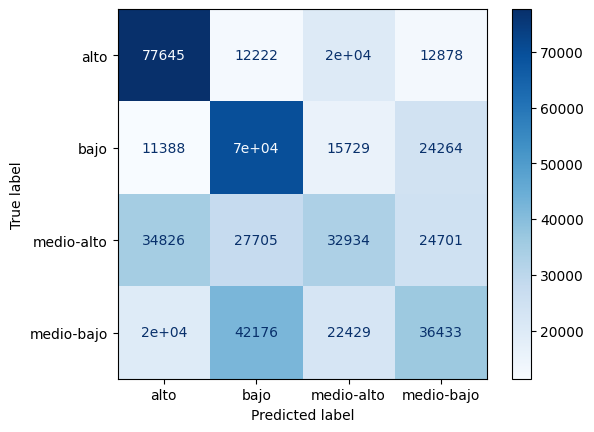

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir etiquetas
y_pred = xgb.predict(Xtrm)

# Calcular la matriz de confusión
cm = confusion_matrix(ytrm_encoded, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


<Figure size 1000x800 with 0 Axes>

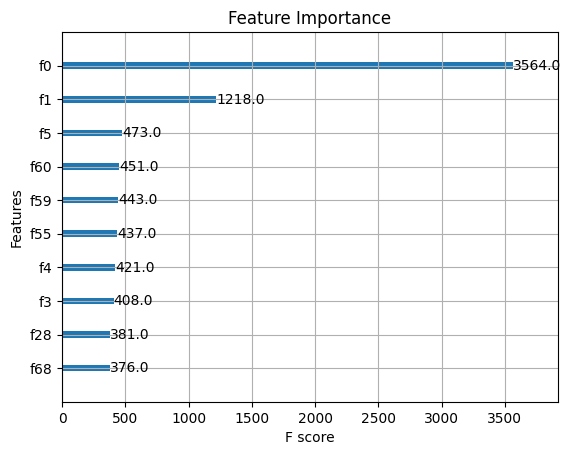

In [35]:
from xgboost import plot_importance

# Mostrar la importancia de características
plt.figure(figsize=(10, 8))
plot_importance(xgb, max_num_features=10)
plt.title('Feature Importance')
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

# Define el grid de hiperparámetros a probar
param_grid = {
    'n_estimators': [300],
    'max_depth': [5],
    'learning_rate': [0.1],
    'subsample': [ 0.9],
    'colsample_bytree': [0.9]
}

# Inicializa el clasificador XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', tree_method='hist')

# Configura la búsqueda en grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Ajusta el modelo a los datos
grid_search.fit(Xtrm, ytrm_encoded)

# Imprimir los mejores parámetros
print("Mejores parámetros: ", grid_search.best_params_)
print("Mejor puntuación: ", grid_search.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores parámetros:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.9}
Mejor puntuación:  0.42145522605365304
